Derrick Lor 4/25/2024
COMP 5430 Artificial Intelligence
Mid Project Update

System Requirements and Dependencies:
> Python version 3.10.6<br>
> Pygame version 2.5.2<br>
> Numpy version 1.23.3<br>
> Matplotlib version 3.7.1<br>
> Associated game files: black.png, board.png, white.png<br>



In [2]:
from Omok import *
import matplotlib.pyplot as plt
import numpy as np

pygame 2.5.2 (SDL 2.28.3, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


Run the code snip below to play my version of Omok with two players.

In [9]:
PlayOmokPygame(PLAYER, PLAYER)

Run the code snip below to play my version of Omok against my AI Omok bot.

In [ ]:
PlayOmokPygame(PLAYER, ENEMY)

Start collecting data and interpreting results from AI bot versus AI bot

Run the Omok game using my MDP for 3 runs each with 10 episodes, for total of 30 observed episodes and tally results in numpy lists. <br>
Also tally the wins for each player. Then display information in graphs.

In [11]:
runs = 4
episodes = 50

p1RewardList = np.zeros((runs, episodes))
stepsPerEpisode = np.zeros((runs, episodes))
winrateList = np.zeros((3, episodes))
positionsHeatmap = np.zeros((9, 9))

for k in range(runs):

    for i in range(episodes):
        board = Board(9, 5)
        p1Reward = 0
        running = True
        while running:
            
            if board.piecesOnBoard < 1:
                #action = (4,4)
                #action = board.get_random_neighbor(4, 4, 1)
                action = board.availableActions[np.random.randint(len(board.availableActions))]
            else:
                rowAgent, colAgent, score = board.minimaxABPruning(1, -np.infty, np.infty, True)
                action = (rowAgent, colAgent)
                
            newstate, reward, running, winner = board.step(action)
            p1Reward += reward

            if winner == PLAYER:
                #print("PLAYER won")
                winrateList[0][i] += 1
                for pr in range(board.boardSize):
                    for pc in range(board.boardSize):
                        if board.board[pr][pc] == PLAYER:
                            positionsHeatmap[pr][pc] +=1
                
            if winner == ENEMY:
                #print("ENEMY won")
                winrateList[1][i] +=1 # ( np.sum(winrateList[1]) +1) / episodes
            if winner == DRAW:
                #print("DRAW")
                winrateList[2][i] += 1#( np.sum(winrateList[2]) +1) / episodes
        
        stepsPerEpisode[k][i] = board.piecesOnBoard
        p1RewardList[k][i] = p1Reward

    print(f'Number of player wins: {np.sum(winrateList[0])}')
    print(f'Number of player loss: {np.sum(winrateList[1])}')
    print(f'Number of player draws: {np.sum(winrateList[2])}')
    

    

Number of player wins: 20.0
Number of player loss: 29.0
Number of player draws: 1.0
Number of player wins: 40.0
Number of player loss: 54.0
Number of player draws: 6.0
Number of player wins: 54.0
Number of player loss: 86.0
Number of player draws: 10.0
Number of player wins: 73.0
Number of player loss: 116.0
Number of player draws: 11.0


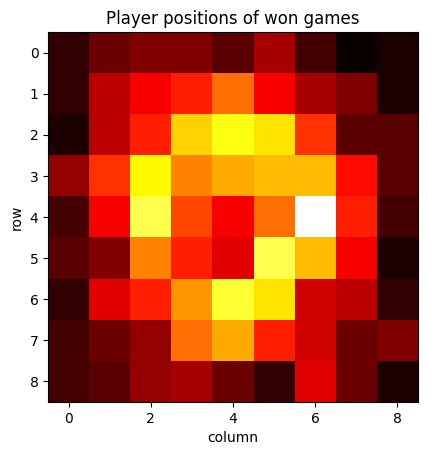

In [12]:
a = np.random.random((9, 9))
plt.imshow(positionsHeatmap, cmap='hot', interpolation='nearest', label="player 1")

plt.title("Player positions of won games")
plt.xlabel("column")
plt.ylabel("row")
#plt.legend()
plt.show()

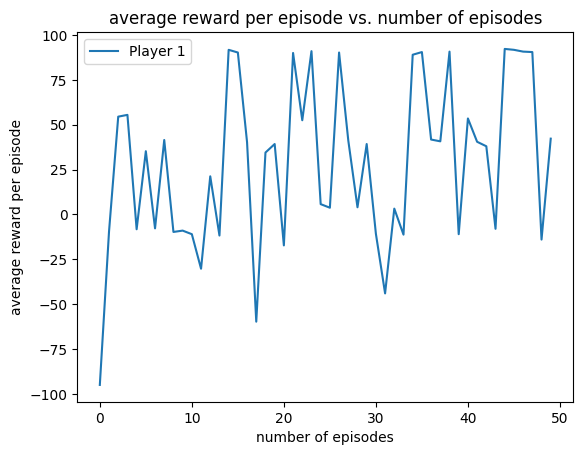

In [5]:
x = np.arange(episodes)

plt.plot(x, np.mean(p1RewardList, axis = 0), label="Player 1")

plt.title("average reward per episode vs. number of episodes")
plt.xlabel("number of episodes")
plt.ylabel("average reward per episode")
plt.legend()
plt.show()


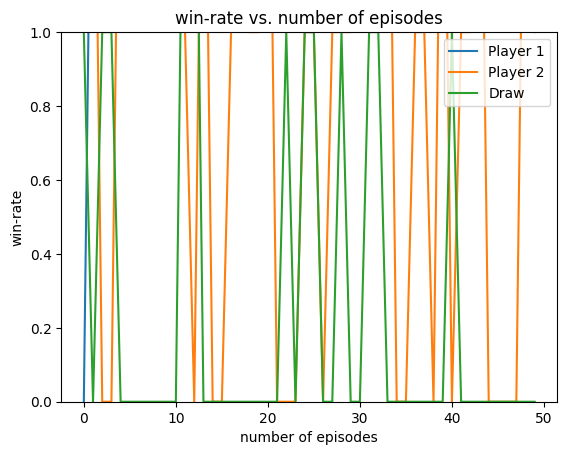

In [6]:
x = np.arange(episodes)

plt.plot(x, winrateList[0], label="Player 1")
plt.plot(x, winrateList[1], label="Player 2")
plt.plot(x, winrateList[2], label="Draw")

plt.title("win-rate vs. number of episodes")
plt.xlabel("number of episodes")
plt.ylabel("win-rate")
plt.ylim(0,1)
plt.legend()
plt.show()

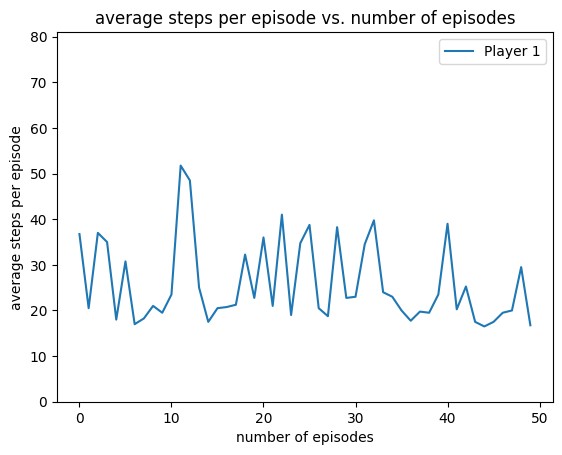

In [9]:
x = np.arange(episodes)

plt.plot(x, np.mean(stepsPerEpisode, axis=0), label="Player 1")

plt.title("average steps per episode vs. number of episodes")
plt.xlabel("number of episodes")
plt.ylabel("average steps per episode")
plt.ylim(0,board.boardSize**2)
plt.legend()
plt.show()